# Structure motifs for covariance and correlation
This notebook is supplementary material for the paper "Motitfs for processes on networks". Use the first part of this notebook to explore total and specific contributions of structure motifs to covariance and correlation of node pairs in the multivariate Ornstein-Uhlenbeck process. The second part of this notebook includes the computation of Pearson correlation coefficients for total contributions with mean total subgraph contributions and for specific contributions and heuristics $\gamma$ and $\gamma'$ that are included in the paper.

In [1]:
# imports
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.font_manager import FontProperties

import numpy as np
import networkx as nx
import time

from graphlet_contributions import * 

# matplotlib settings
#matplotlib.rcParams['mathtext.fontset'] = 'cm' #'stix'
matplotlib.rcParams['text.latex.preamble'] = [
    r'\usepackage{amsmath}', r'\usepackage{amssymb}',
    r'\usepackage{textcomp}', r'\usepackage{wasysym}']
matplotlib.rcParams['font.family'] = 'STIXGeneral' #'cmu serif' #'STIXGeneral'
matplotlib.rcParams['font.size'] = 14
matplotlib.pyplot.title(r'ABC123 vs $\mathrm{ABC123}^{123}$')

matplotlib.rc('text', usetex=True)

<ipython-input-1-16ce27f6bb0e>:15: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  matplotlib.rcParams['text.latex.preamble'] = [


## Part 1

Use this part of this notebook to explore total and specific contributions of structure motifs to covariance and correlation of node pairs in the multivariate Ornstein-Uhlenbeck process.

#### Setting parameters
The code in the cell below displays the structure motifs with largest (or the smallest) contributions to covariance of correlation. You can specify which types of structure motifs (number of edges, directed or undirected structure motifs, and structure motifs with selfedges or without selfedges), which contributions (contributions for covariance or contributions for correlation, total contributions or specific contributions, and largest or smallest contributions, value of $\epsilon$). Use `--help plot_structure_motifs` to see full list of options.

#### Precomputed data
The function `plot_structure_motifs` will attempt the load data on contributions from previous runs. Because of this, running the code for a set of parameters can take long the first time. Running it again with the same parameters should take less than a minute. (Maybe a bit longer for large $m$ and large cutoff values.) For the coupling parameter $\epsilon\in\{0.1, 0.49\}$, the number $m$ of edges $\leq 6$ and a motif-number cutoff of 30, we computed all contributions and included the data in this repository. So you can explore the 30 largest (and the 30 smallest) contributions to covariance and correlation for $\epsilon\in\{0.1, 0.49\}$ and $m\leq 6$ without waiting for long computations to finish.

#### Computation times
Depending on the function parameters, the calculation of contributions can take anything from a few seconds to more time than the Solar system has left to live. Computation time depends especially strongly on the number `m` of edges for the compared structure motifs. Expect results for $m\leq4$ within seconds or minutes. Expect results for $m=5$ within hours, for $m=6$ within days. We advise against using this code to compute contributions for structure motifs with $m>6$.

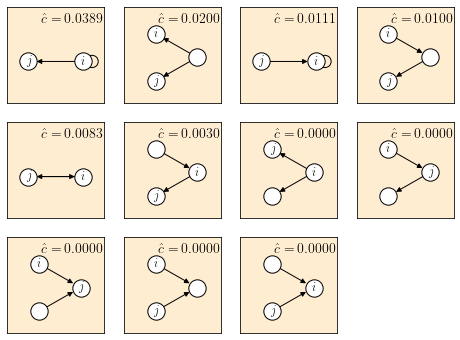

In [3]:
m = 2
epsilon = 0.49

plot_structure_motifs('covariance', # function of interest: either 'covariance' or 'correlation'
                      m, # number of edges
                      epsilon, # coupling parameter for the Ornstein--Uhlenbeck process
                      specific=True, # specific contributions if True else total contributions
                      flops=False, # smallest contributions if True else largest contributions
                      directed=True, # structure motifs have directed edges if True else undirected edges
                      selfedges=True, # structure motifs can have self-edges if True
                      load=False, # looks for precomputed data if True
                      directory='data/', # where to look for precomputed data
                      cutoff=30, # maximal number of structure motifs to save and display
                      precision=4 # number of decimal points for displayed contributions
                      )

In [14]:
# description of arguments for plot_structure_motifs
help(plot_structure_motifs)

Help on function plot_structure_motifs in module graphlet_contributions:

plot_structure_motifs(q, m, epsilon, directed=True, selfedges=True, specific=True, flops=False, cutoff=30, a_val=0.4082482904638631, load=True, save=True, directory='data/', approximation=None, subdirs=['all/', 'max/'], precision=4)
    Plot structure motifs and their contributions to covariance or correlation.
    
    Parameters
    ----------
    q : ['covariance' | 'cov' | 'correlation' | 'cor' | 'corr' ]
       String indicating the quantity that should be used to rank graphlets. The
       quantity can either be 'covariance' or 'correlation'. Short-cuts 'cov' 
       for 'covariance' and 'cor' or 'corr' for 'correlation' are also accepted.
        
    m : int
       Number of edges in graphlet
       
    epsilon : float
       Coupling parameter of the Ornstein--Uhlenbeck process
       
    directed : bool (optional)
       If True, consider directed graphlets. If False, consider undirected 
       graph

#### Computing more contributions
The function `initial_computation` can be helpful to sweep through many the many combinations of contribution types and graphs with a single command. Use `help(initial_computation)` to learn how to choose keyword arguments. In the example below, we compute the data that is needed for computing the Pearson correlation coefficients for heuristic approximations in the paper. We use a large cutoff to ensure that all structure motifs are included (and none are actually cutoff). This may take some time (several hours) to compute.

In [2]:
t = time.time()
initial_computation(m_range=range(1,7), flops=False, directory='data/', load=True, cutoff=45000)
initial_computation(m_range=range(1,7), flops=False, directory='data/', load=True, approximation='max', cutoff=45000)
initial_computation(m_range=range(1,7), flops=False, directory='data/', load=True, approximation='all', cutoff=45000)
print('completed in',time.time()-t,'seconds')

1 False True True True 0.1 1 0.019456863403320312
1 False True True True 0.49 1 0.012964248657226562
1 False True True False 0.1 1 0.003987789154052734
1 False True True False 0.49 1 0.005983829498291016
1 False True False True 0.1 1 0.003988981246948242
1 False True False True 0.49 1 0.003991127014160156
1 False True False False 0.1 1 0.004984378814697266
1 False True False False 0.49 1 0.0029921531677246094
1 False False True True 0.1 1 0.017951488494873047
1 False False True True 0.49 1 0.013962745666503906
1 False False True False 0.1 1 0.0029897689819335938
1 False False True False 0.49 1 0.002991914749145508
1 False False False True 0.1 1 0.003983974456787109
1 False False False True 0.49 1 0.0039899349212646484
1 False False False False 0.1 1 0.0029926300048828125
1 False False False False 0.49 1 0.001995086669921875
2 False True True True 0.1 11 0.011967658996582031
2 False True True True 0.49 11 0.01296544075012207
2 False True True False 0.1 11 0.02194046974182129
2 False Tru

5 False True True True 0.1 3903 0.22387361526489258
5 False True True True 0.49 3903 0.33461427688598633
5 False True True False 0.1 3903 0.28826022148132324
5 False True True False 0.49 3903 0.3061494827270508
5 False True False True 0.1 2281 0.14957857131958008
5 False True False True 0.49 2281 0.24434709548950195
5 False True False False 0.1 2281 0.2015974521636963
5 False True False False 0.49 2281 0.24933481216430664
5 False False True True 0.1 189 0.061835289001464844
5 False False True True 0.49 189 0.03390836715698242
5 False False True False 0.1 189 0.05876803398132324
5 False False True False 0.49 189 0.03589963912963867
5 False False False True 0.1 73 0.031879425048828125
5 False False False True 0.49 73 0.022971153259277344
5 False False False False 0.1 73 0.023940086364746094
5 False False False False 0.49 73 0.02523064613342285
6 False True True True 0.1 30956 2.4982852935791016
6 False True True True 0.49 30956 2.9709973335266113
6 False True True False 0.1 30956 3.08340

## Part 2

#### Pearson correlation coefficient for total contributions and mean total contributions of subgraphs

In [3]:
from scipy.stats import pearsonr

for m in range(2,7):
    t0 = time.time()
    
    # get graphlets
    graphs = []
    for n in range(2, m+2):
        graphs = graphs + nonisomorphic_2FN_graphs(n, m, directed=True, 
                                                   selfedges=True, load=True,
                                                   isolates=False, save=True,
                                                   directory='data/')
    print(str(m)+' edges')
    print('(completed in', time.time()-t0, 'seconds)')
    
    # get contributions
    for epsilon in [0.1, 0.49]:
        t0 = time.time()
        covs = np.zeros(len(graphs))
        cors = np.zeros(len(graphs))
        mean_covs = np.zeros(len(graphs))
        mean_cors = np.zeros(len(graphs))
        for i, g in enumerate(graphs):
            covs[i] = covariance(g, epsilon, adjacency_matrix=None)
            cors[i] = correlation(g, epsilon, adjacency_matrix=None)
            total_cov = 0
            total_cor = 0
            for j, e in enumerate(g.edges()):
                g_temp = nx.DiGraph(g)
                g_temp.remove_edge(e[0],e[1])
                total_cov += covariance(g_temp, epsilon, adjacency_matrix=None)
                total_cor += correlation(g_temp, epsilon, adjacency_matrix=None)
            mean_covs[i] = total_cov/g.number_of_edges()
            mean_cors[i] = total_cor/g.number_of_edges()
        print('epsilon=', epsilon) #time.time()-t0)
        print('covariance', pearsonr(covs, mean_covs))
        print('correlation', pearsonr(cors, mean_cors))
        print('')

2 edges
(completed in 0.002960205078125 seconds)
epsilon= 0.1
covariance (0.9984894855038269, 9.037901351530608e-18)
correlation (0.9993100622804219, 5.557375808336625e-20)

epsilon= 0.49
covariance (0.9463638200877026, 9.520912014898755e-08)
correlation (0.9806413446636048, 1.3737046246205082e-10)

3 edges
(completed in 0.03985476493835449 seconds)
epsilon= 0.1
covariance (0.9998074173865756, 9.145740746470215e-195)
correlation (0.9999077117401415, 8.171780691553603e-213)

epsilon= 0.49
covariance (0.9932109508507929, 1.9921040255184018e-107)
correlation (0.9965509980947951, 5.2654609477319156e-124)

4 edges
(completed in 0.5894668102264404 seconds)
epsilon= 0.1
covariance (0.9999440404832559, 0.0)
correlation (0.999969787461197, 0.0)

epsilon= 0.49
covariance (0.9981180464182501, 0.0)
correlation (0.9989870880911653, 0.0)

5 edges
(completed in 7.566640377044678 seconds)
epsilon= 0.1
covariance (0.9999770221855464, 0.0)
correlation (0.9999862779942745, 0.0)

epsilon= 0.49
covariance 

#### Pearson correlation coefficient for specific contributions and approximations
This may take very long on the first run if contributions with cutoff=45000 have not been computed previously. The large cutoff is necessary to ensure that all non-isomorphic graphs are included when computing the Pearson correlation coefficients.

In [4]:
cutoff=45000 # choose large cutoff to make sure that no structure motifs are omitted

t0 = time.time()
dirs = ['data/', 'data/approx_all/','data/approx_max/']
approx= [None, 'all', 'max']
pvals = []
for m in range(2,7): #for k in range(3):
    print('m='+str(m))
    contributions = [[],[],[]]
    GRAPHLETS = [[],[],[]]
    for k in range(3): #for m in range(6,7):
        graphlets = all_top_graphlets('cov', m, 0.1, directed=True, selfedges=True, 
                                      specific=True, directory='data/', subdirs=['all/','max/'],
                                      flops=False, load=True, approximation=approx[k],
                                      a_val=1/np.sqrt(6), cutoff=cutoff)
        GRAPHLETS[k] = GRAPHLETS[k] + graphlets

        GRAPHLETS[k] = sorted(GRAPHLETS[k], key= lambda x: (x[0].number_of_edges(), 
                                                            x[0].number_of_nodes(),
                                                            str(x[0].edges()),
                                                            str(nx.get_node_attributes(x[0], 'label').values())))    

        contributions[k] = np.array([p[1] for p in GRAPHLETS[k]])
    
    #threshold_index = min([len(contributions[0]),10]) #max([int(len(contributions[0])/20),3])
    p1 = pearsonr(contributions[0], contributions[1])
    p2 = pearsonr(contributions[0], contributions[2])
    print('gamma Pearson correlation coefficient:', p1)
    print('gamma2 Pearson correlation coefficient:', p2)
    pvals += [p1[1]]
    pvals += [p2[1]]
print('pvals')
print(max(pvals))  

print('computation completed in', time.time()-t0, 'seconds')

m=2
gamma Pearson correlation coefficient: (0.6722167112092918, 0.023457649010745166)
gamma2 Pearson correlation coefficient: (0.8247303757188342, 0.0017839891182791065)
m=3
gamma Pearson correlation coefficient: (0.891495294963794, 2.004538533534376e-25)
gamma2 Pearson correlation coefficient: (0.9245718554766922, 1.2542936033402398e-30)
m=4
gamma Pearson correlation coefficient: (0.9751099663657714, 0.0)
gamma2 Pearson correlation coefficient: (0.9073570254411534, 5.482247755804172e-199)
m=5
gamma Pearson correlation coefficient: (0.9930980470937286, 0.0)
gamma2 Pearson correlation coefficient: (0.8538767644182252, 0.0)
m=6
gamma Pearson correlation coefficient: (0.9935730531604489, 0.0)
gamma2 Pearson correlation coefficient: (0.8114023469302939, 0.0)
pvals
0.023457649010745166
computation completed in 7.139735221862793 seconds
